# Lab 01: Matplotlib 막대 그래프 (Bar Chart)

이 노트북에서는 Python의 matplotlib 라이브러리를 사용하여:
1. 1부터 100까지의 숫자 분포를 막대 그래프로 시각화합니다.
2. 다양한 스타일의 막대 그래프를 생성합니다.

### Vibe Prompt
1. 파이썬의 matplotlib 라이브러리를 사용해서 
2. 1부터 100까지 숫자 분포를 막대 그래프로 그려줘 
3. 생성된 코드를 Lab01.ipynb 파일로 저장해줘

In [8]:
# 필요한 라이브러리 임포트
import matplotlib.pyplot as plt
import numpy as np

## 1. 기본 막대 그래프: 1부터 100까지 전체 표시

1부터 100까지의 모든 숫자를 막대 그래프로 표시합니다.

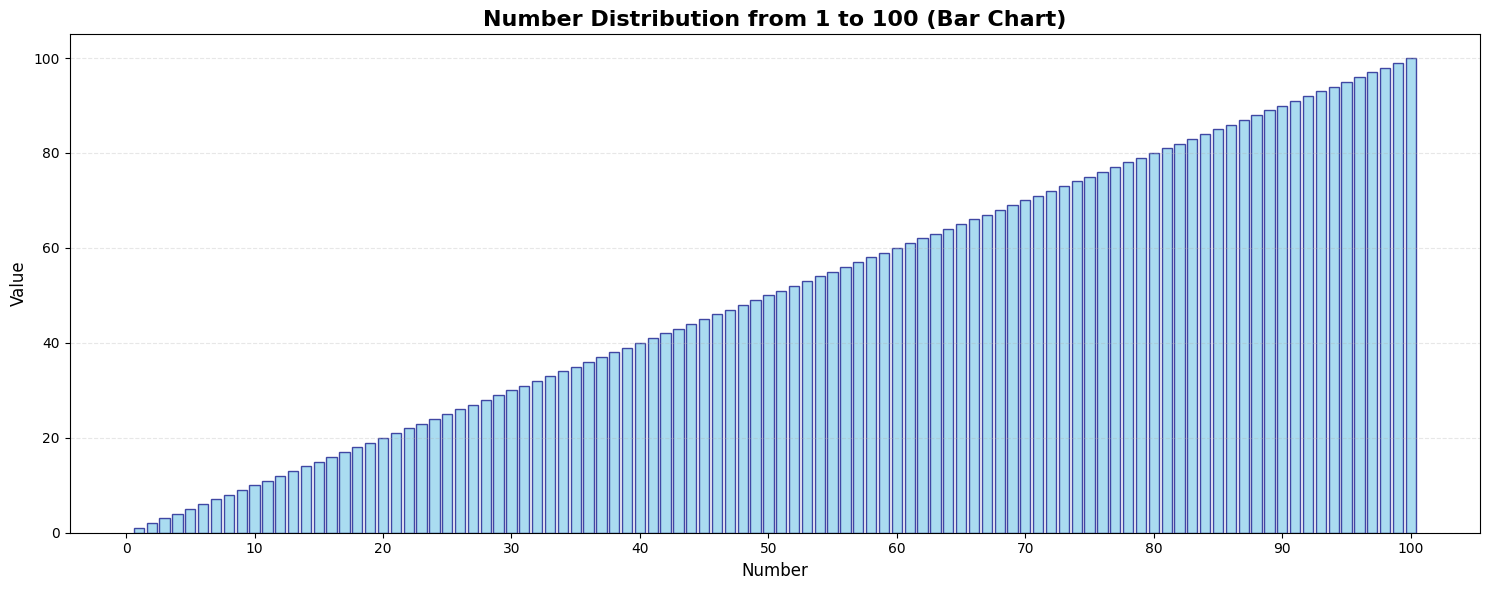

In [7]:
# 그래프 크기 설정
plt.rcParams['figure.figsize'] = (12, 6)

# 한글 대신 영어 사용
numbers = np.arange(1, 101)
plt.figure(figsize=(15, 6))
plt.bar(numbers, numbers, color='skyblue', edgecolor='navy', alpha=0.7)
plt.title('Number Distribution from 1 to 100 (Bar Chart)', fontsize=16, fontweight='bold')
plt.xlabel('Number', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.xticks(np.arange(0, 101, 10))
plt.tight_layout()
plt.show()

## 2. 구간별 막대 그래프: 10개 단위로 그룹화

1-10, 11-20, ..., 91-100으로 구간을 나누어 각 구간의 합계를 표시합니다.

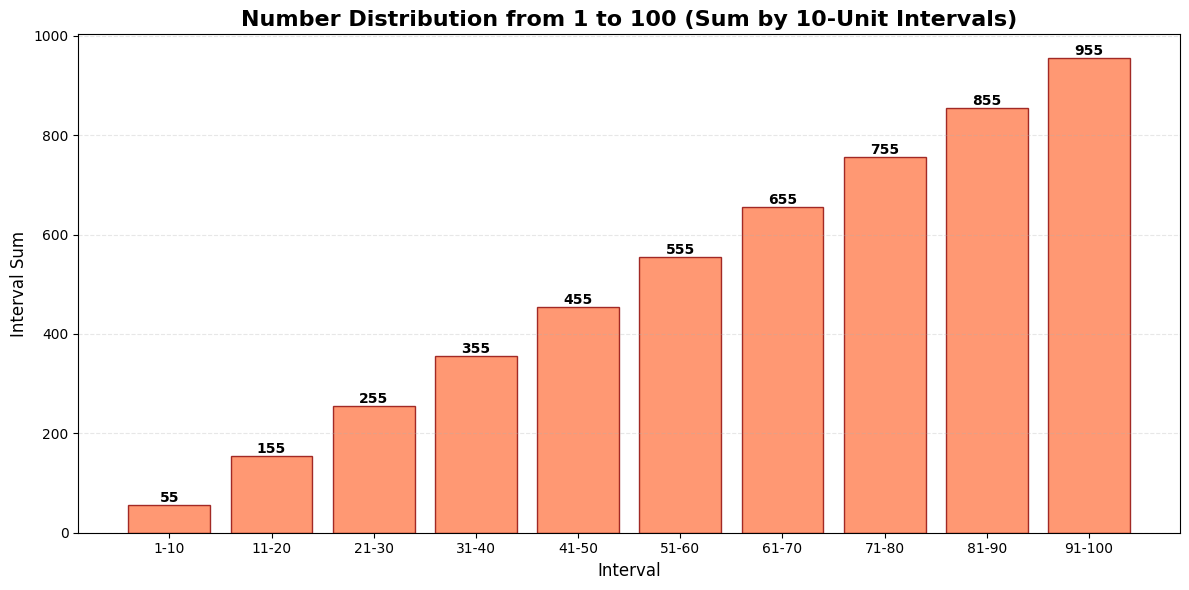


각 구간별 합계:
1-10: 55
11-20: 155
21-30: 255
31-40: 355
41-50: 455
51-60: 555
61-70: 655
71-80: 755
81-90: 855
91-100: 955


In [10]:
# 10개 단위로 구간 나누기
bins = 10
groups = []
group_labels = []

for i in range(bins):
    start = i * 10 + 1
    end = (i + 1) * 10
    group_sum = sum(range(start, end + 1))
    groups.append(group_sum)
    group_labels.append(f'{start}-{end}')

# 막대 그래프 생성
plt.figure(figsize=(12, 6))
bars = plt.bar(group_labels, groups, color='coral', edgecolor='darkred', alpha=0.8)

# 각 막대 위에 값 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# 그래프 제목 및 레이블
plt.title('Number Distribution from 1 to 100 (Sum by 10-Unit Intervals)', fontsize=16, fontweight='bold')
plt.xlabel('Interval', fontsize=12)
plt.ylabel('Interval Sum', fontsize=12)

# 그리드 추가
plt.grid(axis='y', alpha=0.3, linestyle='--')

# 그래프 표시
plt.tight_layout()
plt.show()

print("\n각 구간별 합계:")
for label, value in zip(group_labels, groups):
    print(f"{label}: {value}")

## 3. 색상 그라데이션 막대 그래프

값의 크기에 따라 색상이 변하는 막대 그래프를 생성합니다.

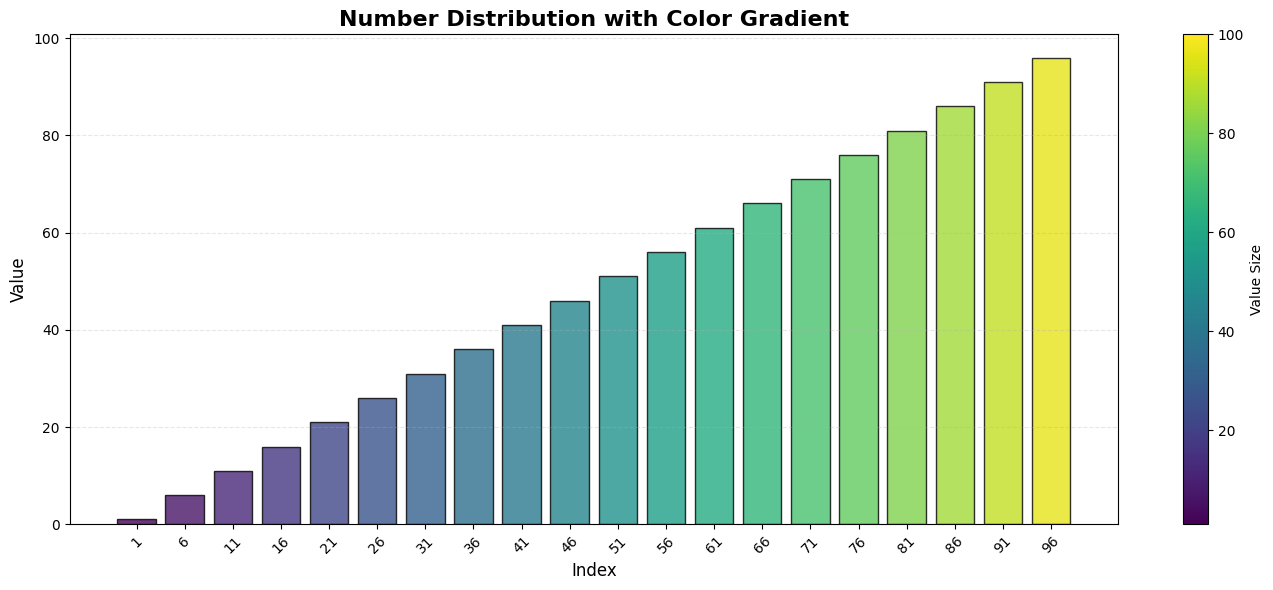

In [12]:
# 1부터 100까지의 숫자 (샘플링하여 20개만 표시)
sample_numbers = np.arange(1, 101, 5)  # 5 간격으로 샘플링

# 색상 맵 생성 (값에 따라 색상 변화)
colors = plt.cm.viridis(sample_numbers / 100)

# 막대 그래프 생성
plt.figure(figsize=(14, 6))
bars = plt.bar(range(len(sample_numbers)), sample_numbers, color=colors, edgecolor='black', alpha=0.8)

# 그래프 제목 및 레이블
plt.title('Number Distribution with Color Gradient', fontsize=16, fontweight='bold')
plt.xlabel('Index', fontsize=12)
plt.ylabel('Value', fontsize=12)

# x축 레이블을 실제 숫자로 변경
plt.xticks(range(len(sample_numbers)), sample_numbers, rotation=45)

# 그리드 추가
plt.grid(axis='y', alpha=0.3, linestyle='--')

# 컬러바 추가 (수정된 부분)
ax = plt.gca()  # 현재 axes 가져오기
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=1, vmax=100))
sm.set_array([])
plt.colorbar(sm, ax=ax, label='Value Size')

# 그래프 표시
plt.tight_layout()
plt.show()

## 4. 가로 막대 그래프 (Horizontal Bar Chart)

10개 단위 구간을 가로 막대 그래프로 표시합니다.

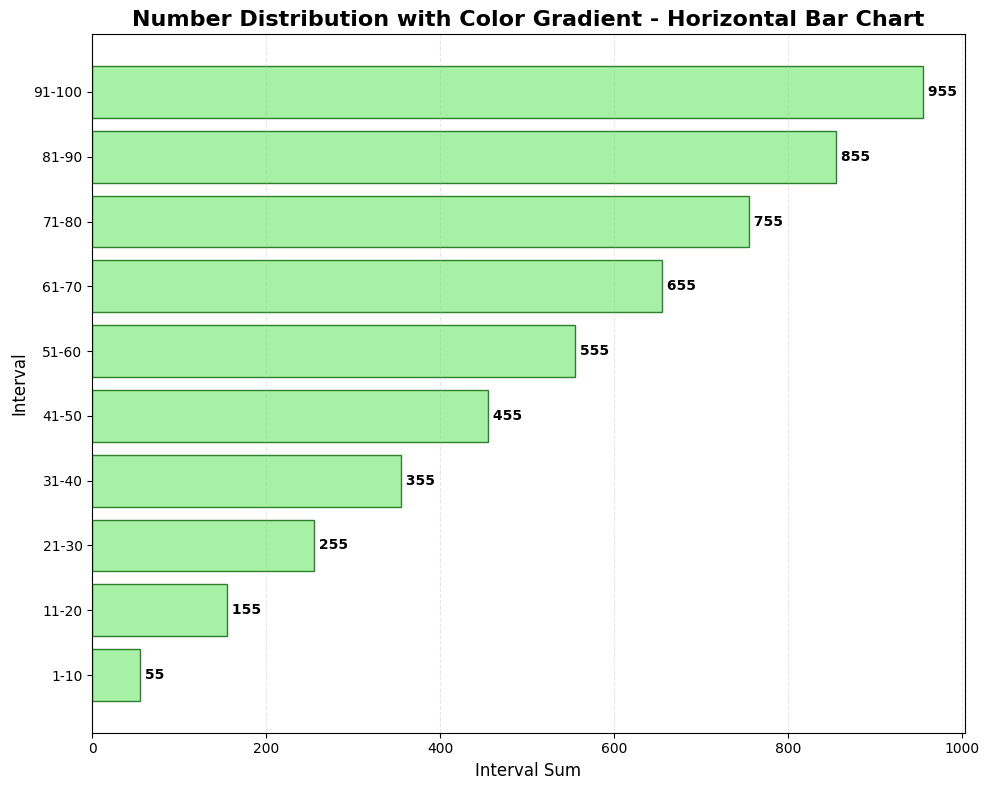

In [14]:
# 가로 막대 그래프 생성
plt.figure(figsize=(10, 8))
bars = plt.barh(group_labels, groups, color='lightgreen', edgecolor='darkgreen', alpha=0.8)

# 각 막대 옆에 값 표시
for i, (bar, value) in enumerate(zip(bars, groups)):
    plt.text(value, i, f' {value}', 
             ha='left', va='center', fontsize=10, fontweight='bold')

# 그래프 제목 및 레이블
plt.title('Number Distribution with Color Gradient - Horizontal Bar Chart', fontsize=16, fontweight='bold')
plt.xlabel('Interval Sum', fontsize=12)
plt.ylabel('Interval', fontsize=12)

# 그리드 추가
plt.grid(axis='x', alpha=0.3, linestyle='--')

# 그래프 표시
plt.tight_layout()
plt.show()

## 5. 통계 정보 표시

1부터 100까지 숫자의 기본 통계 정보를 계산하고 표시합니다.

1부터 100까지 숫자의 통계 정보
Count     :     100.00
Sum       :    5050.00
Mean      :      50.50
Median    :      50.50
Min       :       1.00
Max       :     100.00
Std Dev   :      28.87


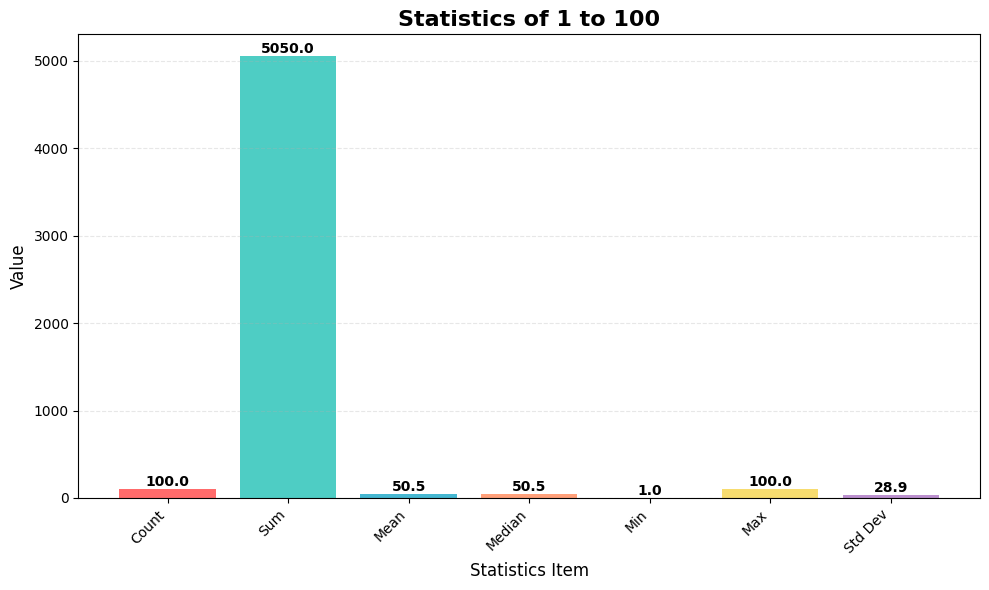

In [17]:
# 1부터 100까지의 숫자
numbers = np.arange(1, 101)

# 통계 정보 계산
stats = {
    'Count': len(numbers),
    'Sum': np.sum(numbers),
    'Mean': np.mean(numbers),
    'Median': np.median(numbers),
    'Min': np.min(numbers),
    'Max': np.max(numbers),
    'Std Dev': np.std(numbers)
}

# 통계 정보 출력
print("=" * 50)
print("1부터 100까지 숫자의 통계 정보")
print("=" * 50)
for key, value in stats.items():
    print(f"{key:10s}: {value:10.2f}")
print("=" * 50)

# 통계 정보를 막대 그래프로 시각화
plt.figure(figsize=(10, 6))
stat_names = list(stats.keys())
stat_values = list(stats.values())

bars = plt.bar(stat_names, stat_values, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F', '#BB8FCE'])

# 각 막대 위에 값 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Statistics of 1 to 100', fontsize=16, fontweight='bold')
plt.xlabel('Statistics Item', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

## 요약

### ✅ 배운 내용:

1. **기본 막대 그래프**: `plt.bar(x, y)`
   - 1부터 100까지 모든 숫자를 막대로 표시
   
2. **구간별 그룹화**:
   - 10개 단위로 구간을 나누어 합계 계산
   - 각 막대 위에 값 표시

3. **색상 그라데이션**:
   - 값의 크기에 따라 색상 변화
   - 컬러바(colorbar) 추가

4. **가로 막대 그래프**: `plt.barh(y, x)`
   - 세로 대신 가로로 표시

5. **통계 정보 시각화**:
   - 평균, 중앙값, 표준편차 등 계산
   - 다양한 색상으로 구분

### 🔑 핵심 코드:

```python
import matplotlib.pyplot as plt
import numpy as np

# 데이터 생성
numbers = np.arange(1, 101)

# 막대 그래프 생성
plt.bar(numbers, numbers, color='skyblue')
plt.title('1부터 100까지 숫자 분포')
plt.xlabel('숫자')
plt.ylabel('값')
plt.show()
```